# **Data Profiling**

## **Importing Data**

Sebagai langkah pertama yang harus dilakukan adalah inisialisasi Library dan mengimport dataset tersebut ke dalam Python menggunakan library Pandas dan diassign sebagai retail_raw.

In [1]:
import pandas as pd
import numpy as np
import io
import pandas_profiling

data_raw = pd.read_csv('https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/retail_raw_reduced_data_quality.csv')
print(data_raw)

      order_id  order_date  customer_id             city     province  \
0      1703458  17/10/2019        14004  Jakarta Selatan  DKI Jakarta   
1      1706815  24/10/2019        17220  Jakarta Selatan  DKI Jakarta   
2      1710718  03/11/2019        16518    Jakarta Utara  DKI Jakarta   
3      1683592  19/08/2019        16364    Jakarta Barat  DKI Jakarta   
4      1702573  16/10/2019        15696    Jakarta Timur  DKI Jakarta   
...        ...         ...          ...              ...          ...   
4995   1724011  01/12/2019        12838        Tangerang       Banten   
4996   1676302  28/07/2019        13833            Bogor   Jawa Barat   
4997   1706071  23/10/2019        16332    Jakarta Timur  DKI Jakarta   
4998   1703620  17/10/2019        13055    Jakarta Barat  DKI Jakarta   
4999   1720036  24/11/2019        17609    Jakarta Pusat  DKI Jakarta   

     product_id    brand  quantity  item_price  
0         P1910  BRAND_J      10.0    740000.0  
1         P2934  BRAND_R 

## **Inspeksi tipe data**
Dengan library Pandas, dapat menjalankan fungsi .dtypes untuk melihat data untuk setiap kolom termasuk tipe datanya.



In [ ]:
print(data_raw.dtypes)

## **Descriptive Statistics**

Di bagian ini, aku akan mempelajari berbagai statistik deskriptif yang dapat digunakan untuk lebih memahami struktur data.

**Length**

Fungsi len menghitung jumlah pengamatan dalam suatu series / column. Fungsi len akan menghitung semua pengamatan, terlepas dari apakah ada null-value atau tidak (include missing value).

In [ ]:
len_city = len(data_raw['city'])
print('Length kolom city:', len_city)

len_pid = len(data_raw['product_id'])
print('Length kolom product_id:',len_pid)

**Count**

Fungsi count menghitung jumlah pengamatan non-NA / non-null dalam suatu series / column. Fungsi len akan hanya menghitung elemen dari kolom yang mempunyai nilai (exclude missing value).

In [ ]:
count_city = data_raw['city'].count()
print('Count kolom count_city:', count_city)

count_pid = data_raw['product_id'].count()
print('Count kolom product_id:', count_pid)

**Missing Value**

Dengan Length dan Count, sekarang dapat menghitung jumlah missing-value. Jumlah nilai yang hilang adalah perbedaan antara Length dan Count.

In [ ]:
number_mv_city = len_city - count_city
flovat_mv_city = float(number_mv_city/len_city)
pct_mv_city = '{0:.1f}%'.format(flovat_mv_city * 100)

print('missing value kolom city:', pct_mv_city)


number_mv_pid = len_pid - count_pid
float_mv_pid = float(number_mv_pid/len_pid)
pct_mv_pid = '{0:.1f}%'.format(float_mv_pid * 100)

print('Persentase missing value kolom product_id:', pct_mv_pid)

**Maximum dan Minimum**

Fungsi max dan min digunakan untuk mengetahui element terbesar dan terkecil dari suatu kolom di dataframe.

**Mean, Medium, Modus dan Standard Deviasi**

Fungsi mean, medium, modus dan standard deviasi digunakan untuk mengetahui pemusatan data dan persebarannya.

In [ ]:
print('Kolom quantity')
print('Minimum value: ', data_raw['quantity'].min())
print('Maximum value: ', data_raw['quantity'].max())
print('Mean value: ', data_raw['quantity'].mean())
print('Mode value: ', data_raw['quantity'].mode())
print('Median value: ', data_raw['quantity'].median())
print('Standard Deviation value: ', data_raw['quantity'].std())

**Quantile Statistics**

Quantiles adalah titik potong yang membagi distribusi dalam ukuran yang sama. Jika akan membagi distribusi menjadi empat grup yang sama, kuantil yang dibuat dinamai quartile. Jika dibagi kedalam 10 sepuluh group yang sama dinamakan percentile. Dalam kasus di bawah ini, ingin membagi distribusi menjadi empat grup atau quartile.

In [ ]:
print('Kolom quantity:')
print(data_raw['quantity'].quantile([0.25, 0.5, 0.75]))

print()

print('Kolom item_price:')
print(data_raw['item_price'].quantile([0.25, 0.5, 0.75]))

**Correlation**

Korelasi adalah cara yang tepat untuk menemukan hubungan antara variabel numerik. Koefisien korelasi berkisar antara -1 hingga 1. Korelasi 1 adalah korelasi positif total, korelasi -1 adalah korelasi negatif total dan korelasi 0 adalah korelasi non-linear.

In [ ]:
print('Korelasi quantity dengan item_price')
print(data_raw[['quantity', 'item_price']].corr())

In [ ]:
import pandas_profiling
from pandas_profiling import ProfileReport

pandas_profiling.ProfileReport(data_raw)

# **Data Cleansing**

## **Missing Data**
Dataset yang ditemui di real-world biasanya akan memiliki banyak missing value. Kemampuan untuk treatment missing value sangat penting karena jika membiarkan missing value itu dapat memengaruhi analisis dan machine learning model. Sehingga jika menemukan nilai yang hilang dalam dataset, harus melakukan treatment sedemikian rupa. Cara check kolom yang mempunyai missing value:

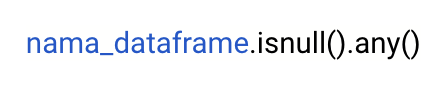


Cara treatment terhadap missing-value antara lain:


1. Leave as it is (dibiarkan)
2. Filling the missing value (imputasi)
3. Drop them (hapus row yang mengandung missing value)
 


Imputasi merupakan suatu metode treatment terhadap missing value dengan mengisinya menggunakan teknik tertentu. Bisa menggunakan mean, modus ataupun menggunakan predictive modelling. Pada modul ini akan membahas mengenai pemanfaatan function fillna dari Pandas untuk imputasi ini, yaitu


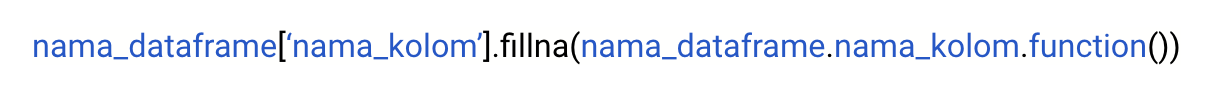

In [ ]:
print(data_raw.isnull().any())

In [ ]:
print(data_raw['quantity'].fillna(data_raw['quantity'].mean()))

In [ ]:
print(data_raw['quantity'].dropna())

## **Outliers**
Mari melihat penggunaannya pada dataframe retail_raw untuk kolom quantity:

In [ ]:
# Q1, Q3, dan IQR
Q1 = data_raw['quantity'].quantile(0.25)
Q3 = data_raw['quantity'].quantile(0.75)
IQR = Q3 - Q1

# Check ukuran (baris dan kolom) sebelum data yang outliers dibuang
print('Shape awal: ', data_raw.shape)

# Removing outliers
data_raw = data_raw[~((data_raw['quantity'] < (Q1 - 1.5 * IQR)) | (data_raw['quantity'] > (Q3 + 1.5 * IQR)))]

# Check ukuran (baris dan kolom) setelah data yang outliers dibuang
print('Shape akhir: ', data_raw.shape)

## **Deduplikasi Data**
Mari melihat penggunaannya pada dataframe retail_raw :

In [ ]:
# cek sebelum data di duplikasi
print('Shape awal: ', data_raw.shape)

# hapus data yang terduplikasi
data_raw.drop_duplicates(inplace=True)

# cek setelah data diduplikasi
print('Shape akhir: ', data_raw.shape)

# **Case Studi: Data Profiling**

Tolong proses dataset terlampir yang  disimpan dalam bentuk csv bernama 'https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/uncleaned_raw.csv'.

Kamu bisa memprosesnya dengan cara berikut:

Import dataset csv ke variable bernama uncleaned_raw
Inspeksi dataframe uncleaned_raw
Check kolom yang mengandung missing value, jika ada, kolom apakah itu dan berapa persen missing value pada kolom tersebut?
Mengisi missing value tersebut dengan mean dari kolom tersebut!
Setelah membaca email tersebut, aku pun memulai kode programnya di code editor.

In [ ]:
# Baca dataset uncleaned_raw.csv
uncleaned_raw = pd.read_csv('https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/uncleaned_raw.csv')

#inspeksi dataframe uncleaned_raw
print('Lima data teratas:')
print(uncleaned_raw.head())

#Check kolom yang mengandung missing value
print('\nKolom dengan missing value:')
print(uncleaned_raw.isnull().any())

#Persentase missing value
length_qty = len(uncleaned_raw['Quantity'])
count_qty = uncleaned_raw['Quantity'].count()

#mengurangi length dengan count
number_of_missing_values_qty = length_qty - count_qty

#mengubah ke bentuk float
float_of_missing_values_qty = float(number_of_missing_values_qty / length_qty)

#mengubah ke dalam bentuk persen
pct_of_missing_values_qty = '{0:.1f}%'.format(float_of_missing_values_qty*100)

#print hasil percent dari missing value
print('Persentase missing value kolom Quantity:', pct_of_missing_values_qty)

#Mengisi missing value tersebut dengan mean dari kolom tersebut
uncleaned_raw['Quantity'] = uncleaned_raw['Quantity'].fillna(uncleaned_raw['Quantity'].mean())

In [ ]:
import pandas as pd
import numpy as np
import io
import pandas_profiling

# membaca dataset uncleaned_raw.csv
uncleaned_raw = pd.read_csv('https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/uncleaned_raw.csv')

#inspeksi dataframe uncleaned_raw
print('Lima teratas:')
print(uncleaned_raw.head())

# cek kolom yang ada missing value
print('\nKolom dengan missing value:')
print(uncleaned_raw.isnull().any())

# persentase missing value
len_qty = len(uncleaned_raw['Quantity'])
count_qty = uncleaned_raw['Quantity'].count()
mv_qty = len_qty - count_qty
float_mv_qty = float(mv_qty / len_qty)

# persentase missing value
print("\nPersentase Missing Value Kolom Quantity : ", '{0:.1f}%'.format(float_mv_qty*100))

# mengisinya dengan mean
uncleaned_raw['Quantity'] = uncleaned_raw['Quantity'].fillna(uncleaned_raw['Quantity'].mean())
print('\nCek Kolom dengan missing value Setelah diisi dengan mean:')
print(uncleaned_raw.isnull().any())

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

uncleaned_raw = pd.read_csv('https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/uncleaned_raw.csv')
uncleaned_raw.boxplot()
plt.show()

## **Case Study: Data Cleansing - Part 1**
Untuk memprosesnya bisa dilakukan dengan cara berikut:

Mengetahui kolom yang memiliki outliers! Gunakan visualisasi dengan boxplot pada dataframe uncleaned_raw.


In [ ]:
import matplotlib.pyplot as plt

#Mengetahui kolom yang memiliki outliers!
uncleaned_raw.boxplot()
plt.show()

## **Case Study: Data Cleansing - Part 2**
Langkah selanjutnya bisa dilakukan dengan cara berikut:

Melakukan proses removing outliers pada kolom UnitPrice.
Checking duplikasi and melakukan deduplikasi dataset tersebut!


In [ ]:
#Check IQR
Q1 = uncleaned_raw['UnitPrice'].quantile(0.25)
Q3 = uncleaned_raw['UnitPrice'].quantile(0.75)
IQR = Q3 - Q1

#removing outliers
uncleaned_raw = uncleaned_raw[~((uncleaned_raw[['UnitPrice']] < (Q1 - 1.5 * IQR)) | (uncleaned_raw[['UnitPrice']] > (Q3 + 1.5 * IQR)))]

#check for duplication
print(uncleaned_raw.duplicated(subset=None))

#remove duplication
uncleaned_raw = uncleaned_raw.drop_duplicates()